$ Safety Stock = Z * \sqrt{(L × σ_D^2) + (σ_{LT} × D)^2}   $

where,

Z: targeted service level, e.g. 95% return a Z socre of 1.65

L: average Lead Time

D: average Demand

$σ_D$: standard deviation of Demand

$σ_{LT}$: standard deviation of Lead Time



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib notebook

In [2]:
df = pd.read_csv('New_Data.csv',index_col = 0)
df

,Id,Date,DeliveryDate,Quantity,Currency,Supplier,NetAmount,Leadtime,AvgLT,StdLT,DailyDemand,LTDemand,StdDmd
0,10206,2017-08-15,2017-08-24,26,USD,Computer & Co,289.380005,9,7.777778,1.867399,5.727273,44.545455,8.187230
1,10206,2017-08-22,2017-08-31,27,USD,Computer & Co,300.510010,9,7.777778,1.867399,5.727273,44.545455,8.187230
2,10206,2017-08-28,2017-09-07,36,USD,Computer & Co,400.679993,10,7.777778,1.867399,5.727273,44.545455,8.187230
3,10206,2017-09-05,2017-09-14,19,USD,Computer & Co,211.470001,9,7.777778,1.867399,5.727273,44.545455,8.187230
4,10206,2017-09-11,2017-09-19,13,USD,Computer & Co,144.690002,8,7.777778,1.867399,5.727273,44.545455,8.187230
5,10206,2017-09-18,2017-09-24,15,USD,Computer & Co,166.949997,6,7.777778,1.867399,5.727273,44.545455,8.187230
6,10206,2017-09-25,2017-10-02,14,USD,Computer & Co,155.820007,7,7.777778,1.867399,5.727273,44.545455,8.187230
7,10206,2017-10-02,2017-10-09,39,USD,Computer & Co,434.070007,7,7.777778,1.867399,5.727273,44.545455,8.187230
8,10206,2017-10-09,2017-10-17,39,USD,Computer & Co,434.070007,8,7.777778,1.867399,5.727273,44.545455,8.187230
9,10206,2017-10-19,2017-10-28,43,USD,Computer & Co,478.589996,9,7.777778,1.867399,5.727273,44.545455,8.187230


In [3]:
df.dtypes

Id                int64
Date             object
DeliveryDate     object
Quantity          int64
Currency         object
Supplier         object
NetAmount       float64
Leadtime          int64
AvgLT           float64
StdLT           float64
DailyDemand     float64
LTDemand        float64
StdDmd          float64
dtype: object

#### Let's first calculate the first part of the equation within the square root:

i.e. $ L × σ_D^2 $

In [4]:
first = df.AvgLT * np.square(df.StdDmd)

#### Then, second part of the equation:

i.e. $(σ_{𝐿𝑇}×𝐷)^2$

In [5]:
second = np.power(df.StdLT * df.DailyDemand, 2)

#### And finnally, the whole equation:


In [6]:
SS = 1.65* np.sqrt(first+second)

In [7]:
df['SafetyStock'] = SS

In [8]:
df.groupby('Id', sort=False).SafetyStock.mean()

Id
10206      41.602759
10245     229.883944
103237    280.459632
103627    355.621668
103723    164.974582
123242    104.626716
123723    122.853360
124437    101.511851
131645     31.302903
131848     54.870558
132127     32.146258
132218     73.787980
13264     124.499045
133437     82.306464
134142     59.893771
13623      76.689519
16132      20.473559
162050    241.365443
16244     190.784260
163236     35.700136
163722    228.033366
17245     245.563673
173237     82.818340
173723    232.915434
181017     31.922136
181723     80.345442
182018    161.208526
182337     92.647912
182934     92.747038
18345     165.689474
             ...    
53723      49.543455
54234      22.980110
54437      74.051341
61151     181.541083
6134      219.348786
61518      73.944275
61945     202.971678
6206      128.222135
62337      65.240409
62827      84.092237
63237     316.273370
63348     229.184615
63834     256.264976
63942      58.726070
6423       89.613987
6945      247.877212
71237     

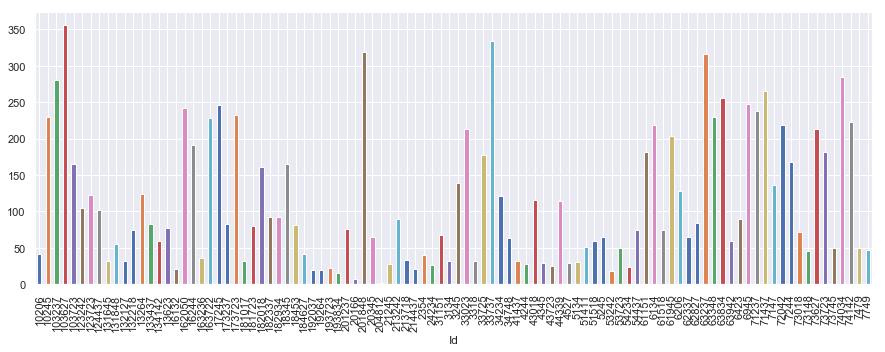

In [9]:
df.groupby('Id', sort=False).SafetyStock.mean().plot('bar', figsize=(15,5))

-------------------------------------------------------------------------------------
$ Reoder Point (ROP) = L*D + SS $

where,

L: average Lead Time

D: average Demand

SS: Safety Stock

In [10]:
# L*D actually gives us the LeadTime Demand 

ROP = df.LTDemand + df.SafetyStock

In [11]:
df['ROP'] = ROP

In [12]:
df.groupby('Id', sort=False).ROP.mean()

Id
10206      86.148213
10245     303.887975
103237    382.513085
103627    459.762054
103723    228.610327
123242    171.072079
123723    175.045157
124437    160.127572
131645     69.345484
131848    109.146579
132127     69.392560
132218    121.342193
13264     196.701394
133437    137.941835
134142    105.684730
13623     128.655256
16132      43.164380
162050    292.400457
16244     239.084260
163236     66.754660
163722    295.815185
17245     347.921950
173237    136.956979
173723    329.709959
181017     65.026026
181723    125.891678
182018    234.129458
182337    149.666351
182934    136.049831
18345     233.870216
             ...    
53723      69.250193
54234      38.445121
54437      94.078399
61151     226.066778
6134      271.522167
61518     102.897462
61945     255.966891
6206      160.431711
62337      90.584754
62827     116.106147
63237     389.938181
63348     270.048755
63834     301.244090
63942      85.562669
6423      119.300092
6945      292.197414
71237     

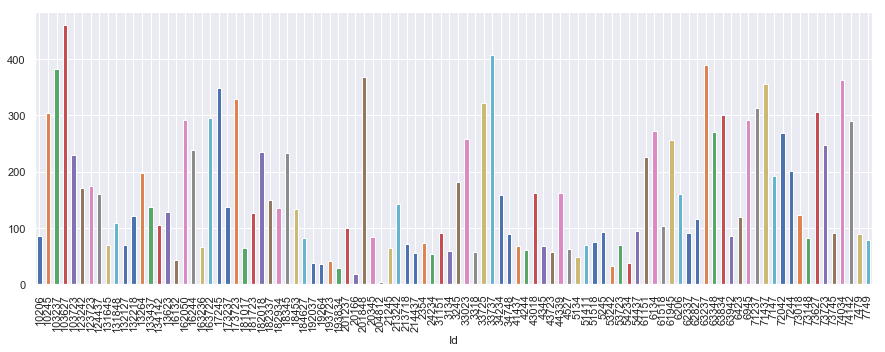

In [13]:
df.groupby('Id', sort=False).ROP.mean().plot(kind='bar', figsize=(15,5))

In [14]:
df.to_csv('Final.csv')